Работа с NumPy

In [11]:
import numpy as np

matrix = np.array([[4, 5, 0], [9, 9, 9]])
print("matrix = \n", matrix, "\n")

tmatrix = matrix.T
print("tmatrix = \n", tmatrix, "\n")

vector = np.ravel(matrix)
print("vector = \n", vector, "\n")

tvector = np.reshape(vector, (6, 1))
print("tvector = \n", tvector, "\n")

list_matrix = list(matrix)
print("list_matrix = \n", list_matrix, "\n")

str_matrix = str(matrix)
print("matrix as str = \n", str_matrix, "\n")

print("matrix type is", type(matrix), "\n")

print("vector type is", type(vector), "\n")

print("list_matrix type is", type(list_matrix), "\n")

print("str_matrix type is", type(str_matrix), "\n")

formatted_vector = "; ".join(map(str, vector))
print("formatted_vector = \n", formatted_vector, "\n")

matrix = 
 [[4 5 0]
 [9 9 9]] 

tmatrix = 
 [[4 9]
 [5 9]
 [0 9]] 

vector = 
 [4 5 0 9 9 9] 

tvector = 
 [[4]
 [5]
 [0]
 [9]
 [9]
 [9]] 

list_matrix = 
 [array([4, 5, 0]), array([9, 9, 9])] 

matrix as str = 
 [[4 5 0]
 [9 9 9]] 

matrix type is <class 'numpy.ndarray'> 

vector type is <class 'numpy.ndarray'> 

list_matrix type is <class 'list'> 

str_matrix type is <class 'str'> 

formatted_vector = 
 4; 5; 0; 9; 9; 9 



Работа с Pandas DataFrame

https://pandas.pydata.org/docs/user_guide/10min.html

Работа с данными - чтение и запись CSV

In [1]:
import pandas as pd

df = pd.read_csv("data/titanic.csv", index_col="PassengerId")

df.to_csv("test.csv")

Работа с данными - основные команды

In [2]:
df.info()

print(df.describe().transpose())

cleared_df = df.drop(["Name", "Ticket", "Embarked"], axis=1)
print(cleared_df.head())
print(cleared_df.tail())

sorted_df = cleared_df.sort_values(by="Age")
print(sorted_df.head())
print(sorted_df.tail())

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB
          count       mean        std   min      25%      50%   75%       max
Survived  891.0   0.383838   0.486592  0.00   0.0000   0.0000   1.0    1.0000
Pclass    891.0   2.308642   0.836071  1.00   2.0000   3.0000   3.0    3.0000
Age       714.0  29.699118  14.526497  0.42  20.1250  28.0000  38.0   80.0000
SibSp     891.0   

Работа с данными - работа с элементами

In [3]:
print(df["Age"])

print(df.loc[100])

print(df.loc[100, "Name"])

print(df.loc[100:200, ["Age", "Name"]])

print(df[0:3])

print(df.iloc[0])

print(df.iloc[3:5, 0:2])

print(df.iloc[[3, 4], [0, 1]])

PassengerId
1      22.0
2      38.0
3      26.0
4      35.0
5      35.0
       ... 
887    27.0
888    19.0
889     NaN
890    26.0
891    32.0
Name: Age, Length: 891, dtype: float64
Survived                    0
Pclass                      2
Name        Kantor, Mr. Sinai
Sex                      male
Age                      34.0
SibSp                       1
Parch                       0
Ticket                 244367
Fare                     26.0
Cabin                     NaN
Embarked                    S
Name: 100, dtype: object
Kantor, Mr. Sinai
              Age                                    Name
PassengerId                                              
100          34.0                       Kantor, Mr. Sinai
101          28.0                 Petranec, Miss. Matilda
102           NaN        Petroff, Mr. Pastcho ("Pentcho")
103          21.0               White, Mr. Richard Frasar
104          33.0              Johansson, Mr. Gustaf Joel
...           ...                     

Работа с данными - отбор и группировка

In [4]:
s_values = df["Sex"].unique()
print(s_values)

s_total = 0
for s_value in s_values:
    count = df[df["Sex"] == s_value].shape[0]
    s_total += count
    print(s_value, "count =", count)
print("Total count = ", s_total)

print(df.groupby(["Pclass", "Survived"]).size().reset_index(name="Count")) # type: ignore

['male' 'female']
male count = 577
female count = 314
Total count =  891
   Pclass  Survived  Count
0       1         0     80
1       1         1    136
2       2         0     97
3       2         1     87
4       3         0    372
5       3         1    119


Визуализация - Исходные данные

In [5]:
data = df[["Pclass", "Survived", "Age"]].copy()
data.dropna(subset=["Age"], inplace=True)
print(data)

             Pclass  Survived   Age
PassengerId                        
1                 3         0  22.0
2                 1         1  38.0
3                 3         1  26.0
4                 1         1  35.0
5                 3         0  35.0
...             ...       ...   ...
886               3         0  39.0
887               2         0  27.0
888               1         1  19.0
890               1         1  26.0
891               3         0  32.0

[714 rows x 3 columns]


Визуализация - Сводка пяти чисел

<img src="assets/quantile.png" width="400" style="background-color: white">

         Age                               
         min    q1    q2 median    q3   max
Pclass                                     
1       0.92  27.0  37.0   37.0  49.0  80.0
2       0.67  23.0  29.0   29.0  36.0  70.0
3       0.42  18.0  24.0   24.0  32.0  74.0
           Age               
       low_iqr   iqr high_iqr
Pclass                       
1          0.0  22.0     82.0
2          3.5  13.0     55.5
3          0.0  14.0     53.0


<Axes: title={'center': 'Age'}, xlabel='Pclass'>

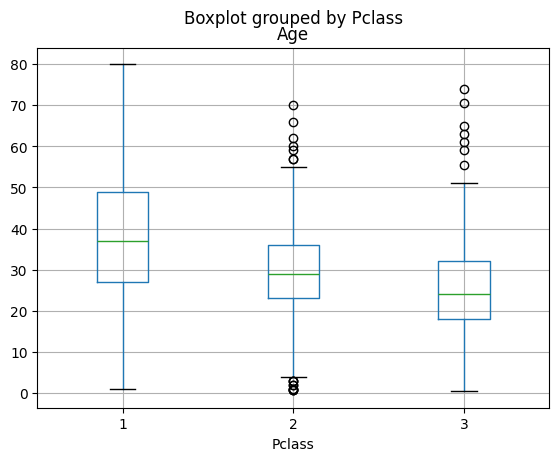

In [6]:
def q1(x):
    return x.quantile(0.25)


# median = quantile(0.5)
def q2(x):
    return x.quantile(0.5)


def q3(x):
    return x.quantile(0.75)


def iqr(x):
    return q3(x) - q1(x)


def low_iqr(x):
    return max(0, q1(x) - 1.5 * iqr(x))


def high_iqr(x):
    return q3(x) + 1.5 * iqr(x)


quantiles = data[["Pclass", "Age"]].groupby(["Pclass"]).aggregate(["min", q1, q2, "median", q3, "max"])
print(quantiles)

iqrs = data[["Pclass", "Age"]].groupby(["Pclass"]).aggregate([low_iqr, iqr, high_iqr])
print(iqrs)

data.boxplot(column="Age", by="Pclass")

Визуализация - Гистограмма

<Axes: ylabel='Frequency'>

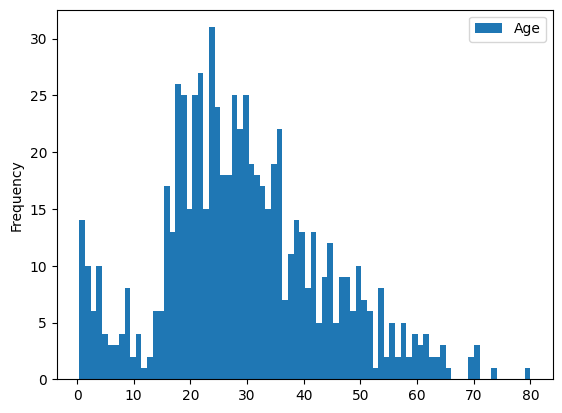

In [7]:
data.plot.hist(column=["Age"], bins=80)

Визуализация - Точечная диаграмма

<Axes: xlabel='Pclass', ylabel='Age'>

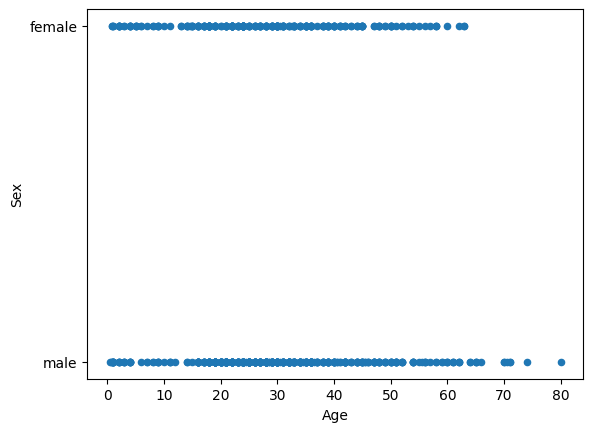

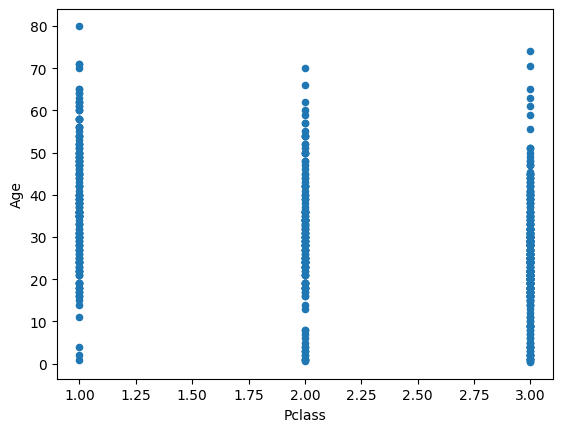

In [8]:
df.plot.scatter(x="Age", y="Sex")

df.plot.scatter(x="Pclass", y="Age")

Визуализация - Столбчатая диаграмма

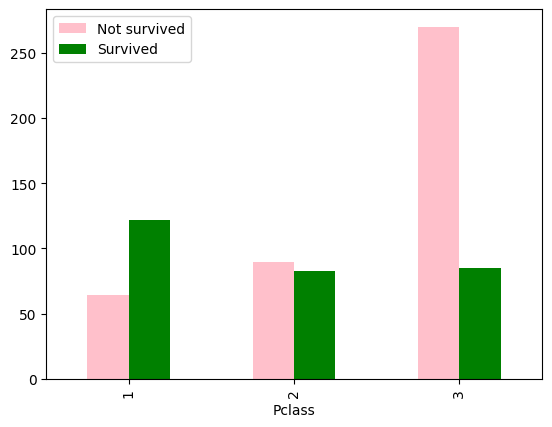

In [9]:
plot = data.groupby(["Pclass", "Survived"]).size().unstack().plot.bar(color=["pink", "green"])
plot.legend(["Not survived", "Survived"])

Визуализация - Временные ряды

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   my_date      243 non-null    object        
 1   my_value     243 non-null    float64       
 2   bullet       2 non-null      object        
 3   bulletClass  2 non-null      object        
 4   label        2 non-null      object        
 5   date         243 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(1), object(4)
memory usage: 11.5+ KB
        my_date  my_value bullet bulletClass label       date
0    28.03.2023   76.5662    NaN         NaN   NaN 2023-03-28
1    31.03.2023   77.0863    NaN         NaN   NaN 2023-03-31
2    01.04.2023   77.3233    NaN         NaN   NaN 2023-04-01
3    04.04.2023   77.9510    NaN         NaN   NaN 2023-04-04
4    05.04.2023   79.3563    NaN         NaN   NaN 2023-04-05
..          ...       ...    ...         ...   ...        ..

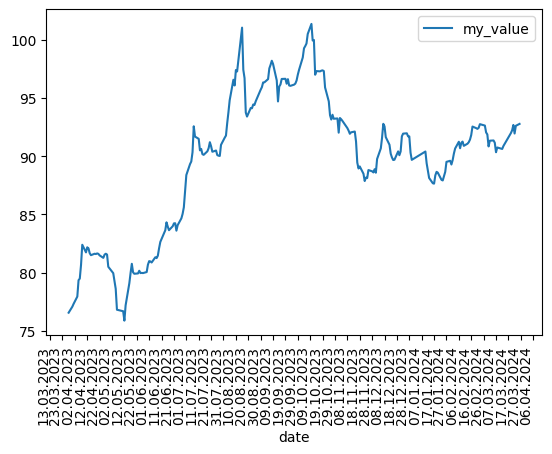

In [10]:
from datetime import datetime
import matplotlib.dates as md

ts = pd.read_csv("data/dollar.csv")
ts["date"] = ts.apply(lambda row: datetime.strptime(row["my_date"], "%d.%m.%Y"), axis=1)
ts.info()

print(ts)

plot = ts.plot.line(x="date", y="my_value")
plot.xaxis.set_major_locator(md.DayLocator(interval=10))
plot.xaxis.set_major_formatter(md.DateFormatter("%d.%m.%Y"))
plot.tick_params(axis="x", labelrotation=90)